# Advanced radiation and remote sensing

Manfred Brath, Oliver Lemke

## Exercise 4: Atmospheric Brightness Temperature Spectra

# BEM 2025: Adapt for vertical displacements in GOES WV [channels](https://www.weather.gov/media/crp/GOES_16_Guides_FINALBIS.pdf)

Band 8: 5.77-6.6 μm (Central wavelength: 6.19 μm) - Upper-level Tropospheric Water Vapor

Band 9: 6.75-7.15 μm (Central wavelength: 6.95 μm) - Mid-level Tropospheric Water Vapor

Band 10: 7.24-7.44 μm (Central wavelength: 7.34 μm) - Lower-level Tropospheric Water Vapor


In [30]:
# 300M m/s divided by 7 microns seems like 42 THz not 428? Well I need GHz anyway so use 1e9

print('range ',3e8 / 8e-6 /1e9, 3e8 / 5e-6 /1e9)

range  37500.0 59999.99999999999


In [3]:
# %matplotlib widget

# Set path to line catalogue
import os
# Uncomment and adjust the following lines
# if ARTS_DATA_PATH is not set as environment variable
#    os.environ["ARTS_DATA_PATH"] = "your_path_to/arts-xml-data/:your_path_to/arts-cat-data/:"

import matplotlib.pyplot as plt
import numpy as np
import typhon as ty
from rtcalc_module import run_arts, tags2tex

plt.style.use(ty.plots.styles("typhon"))

### 1)
The function `run_arts` simulates a brightness temperature and a atmospheric  
zenith opacity spectrum in the microwave spectral range for a midlatitude-summer  
atmosphere over a smooth and wet land surface for a desired height and looking   
direction.


Run the function `run_arts` with the given values for height and direction.  
Ignore the brightness temperature for now and consider the zenith opacity spectrum   
to answer the following questions:

* The spectrum includes four spectral lines. To which species do these lines  
belong? Play around with different absorption species.
* We speak of window regions where the zenith opacity is below 1. Where are they?

In [4]:
# HAD TO ADD THIS CELL https://github.com/atmtools/arts-lectures/issues/96

import pyarts 
pyarts.cat.download.retrieve(verbose=True)

In [31]:
# Parameters
species = ["N2", "O2", "H2O"]
height = 0.0
zenith_angle = 0.0

# run_arts seems to return a fixed range ?
freq, bt, od = run_arts(species, zenith_angle, height)

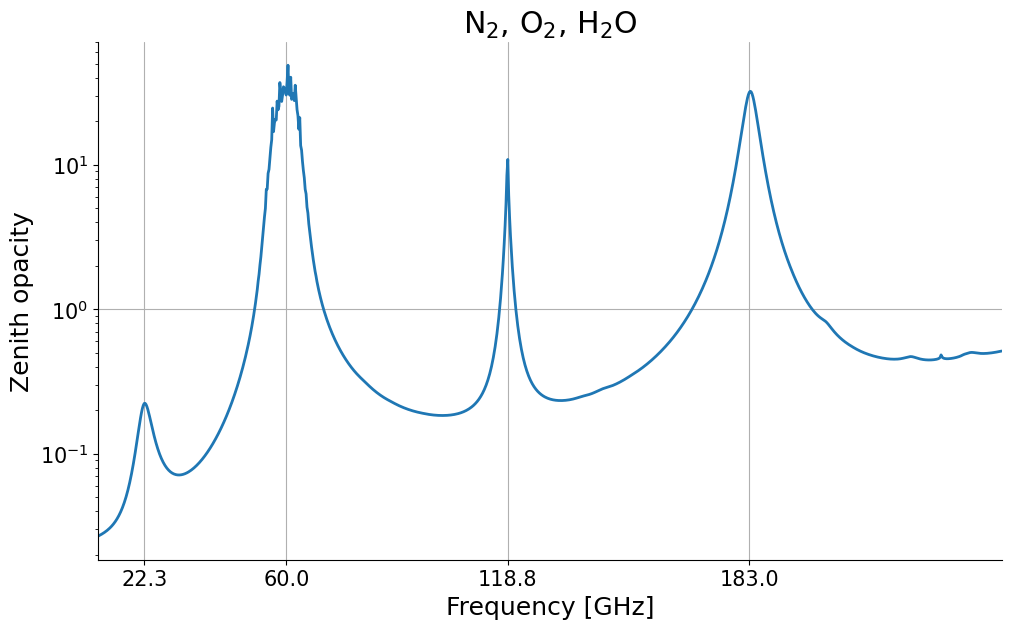

In [6]:
HIGHLIGHT_FREQS = (22.3, 60.0, 118.8, 183.0)

# Plot the zenith opacity with logarithmic scale on y axis
fig, ax = plt.subplots()
ax.semilogy(freq / 1e9, od)
ax.axhline(1, linewidth=0.8, color="#b0b0b0", zorder=0)
ax.grid(True, axis="x")
ax.set_xticks(HIGHLIGHT_FREQS)
ax.set_xlim(freq.min() / 1e9, freq.max() / 1e9)
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel("Zenith opacity")
ax.set_title(f"{', '.join(tags2tex(species))}")
fig.savefig(f"plots/opacity_{'+'.join(species)}.pdf")

### 2)
Brightness temperature is a unit for intensity. It is the temperature of a  
blackbody that emits the same amount of intensity. Mathematically, the  
transformation between intensity in SI units and intensity in brightness  
temperature is done with the Planck formula. ARTS is capable to perform  
simulation in units of brightness temperature. Uncomment the code part for  
the second task. Investigate the brightness temperature spectra for  
different hypothetical sensors:

* A ground-based sensor looking in the zenith direction.
* A sensor on an airplane ($z=10\,\text{km}$) looking in the zenith direction.

Consider both opacity and brightness temperatures to answer the following  
questions:

* In plot (a), why do the lines near $60\,\text{GHz}$ and near $180\,\text{GHz}$   
appear flat on top? 
* In plot (b), why is the line at $180\,\text{GHz}$ smaller than before? 
* Describe the difference between plots (a) and (b). What happens to the  
lines, what happens to the background? Can you explain what you
see? 

In [7]:
# Parameters
species = ["N2", "O2", "H2O"]
height = 0.0
zenith_angle = 0.0

freq, bt, od = run_arts(species, zenith_angle, height)

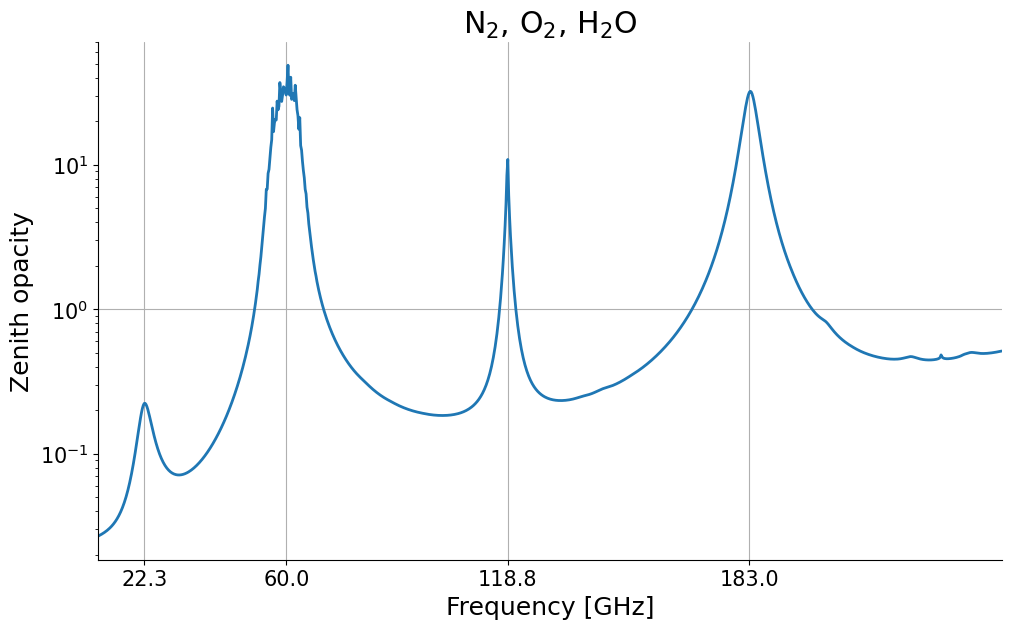

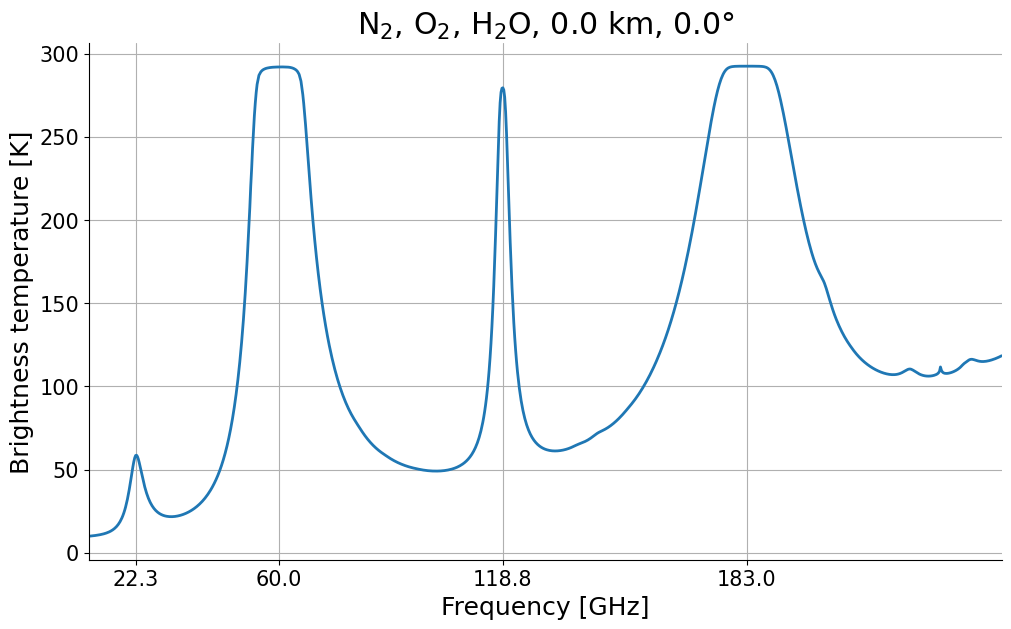

In [8]:
HIGHLIGHT_FREQS = (22.3, 60.0, 118.8, 183.0)

# Plot the zenith opacity with logarithmic scale on y axis
fig, ax = plt.subplots()
ax.semilogy(freq / 1e9, od)
ax.axhline(1, linewidth=0.8, color="#b0b0b0", zorder=0)
ax.grid(True, axis="x")
ax.set_xticks(HIGHLIGHT_FREQS)
ax.set_xlim(freq.min() / 1e9, freq.max() / 1e9)
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel("Zenith opacity")
ax.set_title(f"{', '.join(tags2tex(species))}")
fig.savefig(f"plots/opacity_{'+'.join(species)}.pdf")

# Plot the brightness temperature
fig, ax = plt.subplots()
ax.plot(freq / 1e9, bt)
ax.grid(True)
ax.set_xticks(HIGHLIGHT_FREQS)
ax.set_xlim(freq.min() / 1e9, freq.max() / 1e9)
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel("Brightness temperature [K]")
ax.set_title(f"{', '.join(tags2tex(species))}, {height / 1e3} km, {zenith_angle}°")
fig.savefig(
    f"plots/brightness_temperature_{'+'.join(species)}_{height / 1e3:.0f}km_{zenith_angle:.0f}deg.pdf"
)

### 3)
Make the same calculation as in task 2 for a satellite sensor ($z=800\,\text{km}$) looking  
nadir (straight down).

Answer following questions:

* Explain the brightness temperature simulated in the window regions.
* Why does the line at $22\,\text{GHz}$ look different from the others?
* Investigate the the $\text{O}_{2}$ line at $120\,\text{GHz}$. Perform an ARTS simulation
focused around that frequency. Why does the shape  close to the center of the $\text{O}_{2}$  
line at $120\,\text{GHz}$ looks so differently compared to the $183\,\text{GHz}$. 

In [91]:
#BEM ANSWERS
height = 800000.0
zenith_angle = 180.0

freq, bt, od = run_arts(species, zenith_angle, height)

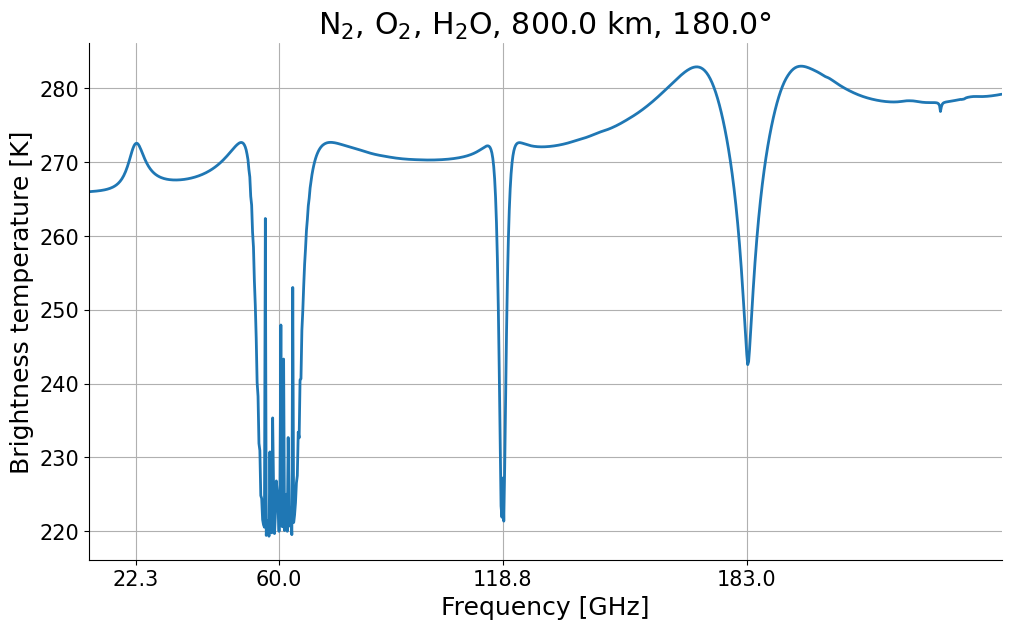

In [14]:
# Plot the brightness temperature
fig, ax = plt.subplots()
ax.plot(freq / 1e9, bt)
ax.grid(True)
ax.set_xticks(HIGHLIGHT_FREQS)
ax.set_xlim(freq.min() / 1e9, freq.max() / 1e9)
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel("Brightness temperature [K]")
ax.set_title(f"{', '.join(tags2tex(species))}, {height / 1e3} km, {zenith_angle}°")
fig.savefig(
    f"plots/brightness_temperature_{'+'.join(species)}_{height / 1e3:.0f}km_{zenith_angle:.0f}deg.pdf"
)

# Let's confirm the spectrum looks okay

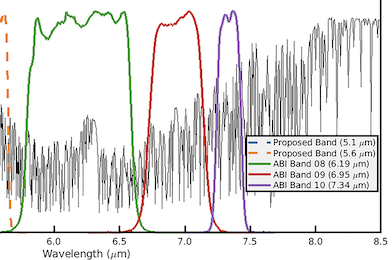

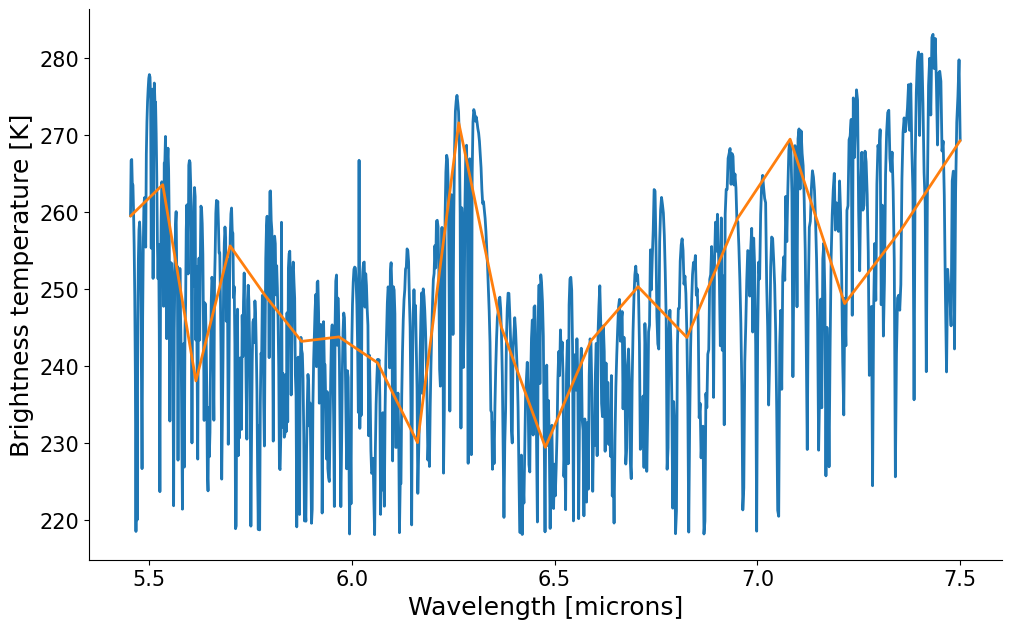

In [147]:
# Looks good, coarse sampling has big errors though 

freqIR, btIR, od = run_arts(species, zenith_angle, height, fmin=40.0e12, fmax=55e12)
# coarse spectrum: an average or samples? Looks like samples. Better resolve it then average! 
freqIRc, btIRc, od = run_arts(species, zenith_angle, height, fmin=40.0e12, fmax=55e12, fnum=20)

plt.plot(300e6/freqIR *1e6, btIR);
plt.plot(300e6/freqIRc*1e6, btIRc);

plt.xlabel("Wavelength [microns]")
plt.ylabel("Brightness temperature [K]");

Text(0.5, 1.0, 'Mean2000 BT: 260.0381270672353 , approx100 259.8304159474682')

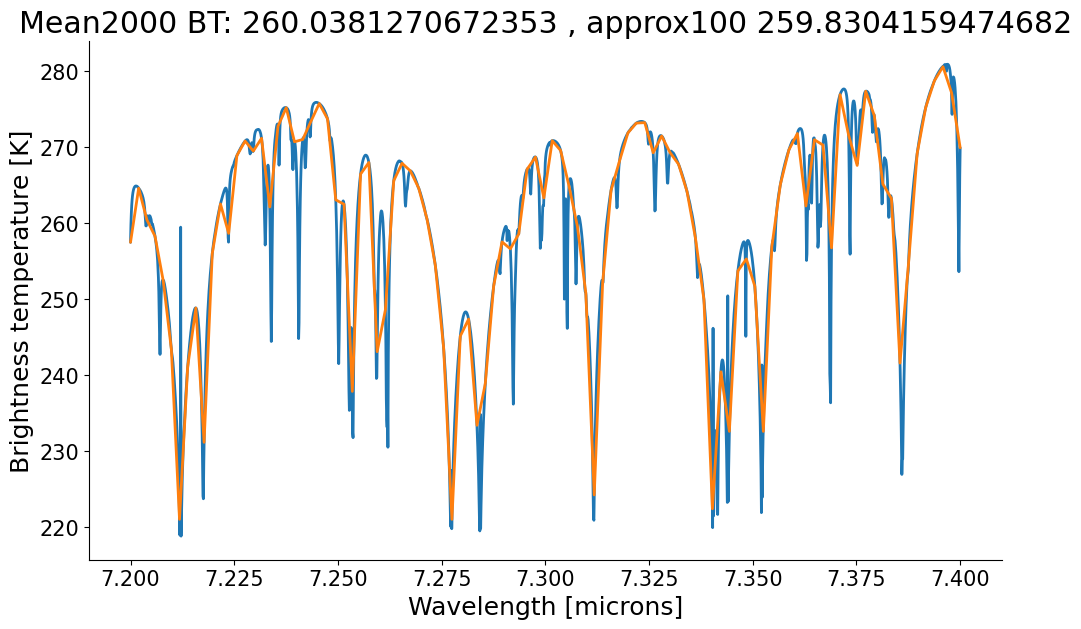

In [144]:
# Zoom in: is 1000 too many for 7.3 band? Does 100 suffice?
# Answer: let's keep 1000 

freqIR, btIR, od = run_arts(species, zenith_angle, height, fmin=3e8/ 7.4e-6, fmax=3e8/7.2e-6, fnum=2000)
# coarse spectrum: an average or samples? Looks like samples. Better resolve it then average! 
freqIRc, btIRc, od = run_arts(species, zenith_angle, height,fmin=3e8/ 7.4e-6, fmax=3e8/7.2e-6, fnum=100)

plt.plot(300e6/freqIR *1e6, btIR);
plt.plot(300e6/freqIRc*1e6, btIRc);

plt.xlabel("Wavelength [microns]")
plt.ylabel("Brightness temperature [K]");
plt.title('Mean2000 BT: '+str(np.mean(btIR))+' , approx100 '+str(np.mean(btIRc))) 

# ABI bands brightness temperatures

Band 8 ("6.2") 5.75-6.6 microns 

Band 9 ("6.9") 6.7-7.2 microns

Band 10("7.3") 7.2-7.4 microns 

In [138]:
# Convert wavelength ranges to (increasing) frequency ranges 
# freqIR, btIR, od = run_arts(species, zenith_angle, height, fmin=38.0e12, fmax=55e12)

height = 100000000.0  # TOA
zenith_angle = 180.0

f8, BT8_6_2, od = run_arts(species, zenith_angle, height, fmin=3e8/ 6.6e-6, fmax=3e8/ 5.75e-6)
f9, BT9_6_9, od = run_arts(species, zenith_angle, height, fmin=3e8/ 7.2e-6, fmax=3e8/ 6.7e-6)
f10,BT10_7_3,od = run_arts(species, zenith_angle, height, fmin=3e8/ 7.4e-6, fmax=3e8/ 7.2e-6)

241.6654609921063 248.8933227778732 260.0744514335408


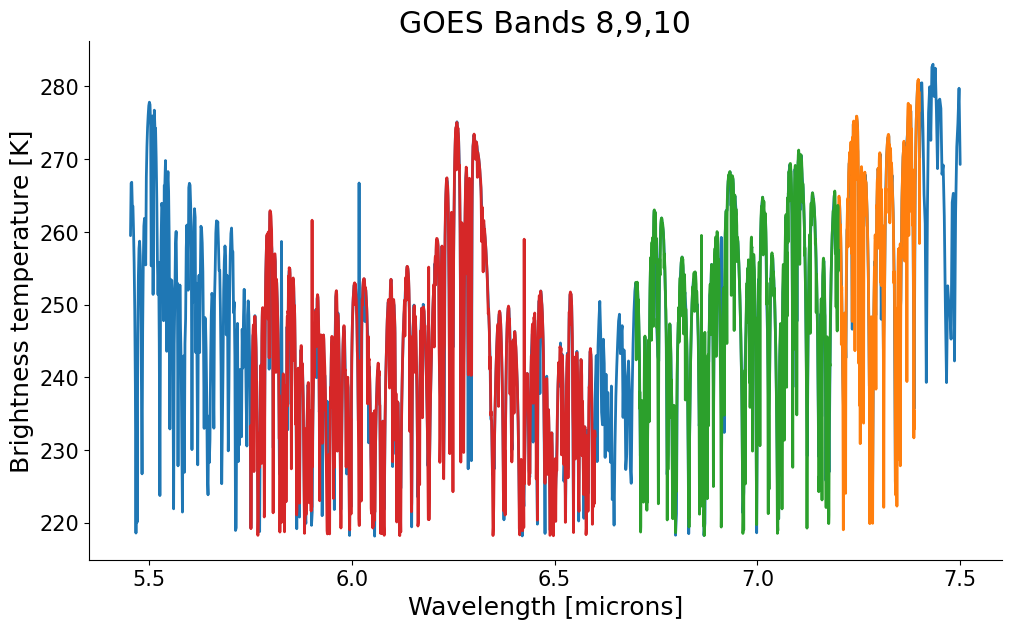

In [171]:
plt.plot(300e6/freqIR *1e6, btIR);

plt.plot(300e6/f10*1e6, BT10_7_3);
plt.plot(300e6/f9*1e6,  BT9_6_9);
plt.plot(300e6/f8*1e6,  BT8_6_2);

plt.xlabel("Wavelength [microns]")
plt.ylabel("Brightness temperature [K]");
plt.title('GOES Bands 8,9,10')

print(np.mean(BT8_6_2), np.mean(BT9_6_9), np.mean(BT10_7_3))

In [173]:
import pyarts.workspace
ws = pyarts.workspace.Workspace(verbosity=1)

In [174]:
ws.AtmFieldPerturbAtmGrids

<bound method PyCapsule.AtmFieldPerturbAtmGrids of Workspace>

In [169]:
ws.AtmFieldPerturbAtmGrids?

Docstring:
AtmFieldPerturbAtmGrids(self: pyarts.arts._Workspace, perturbed_field: Union[pyarts.arts.WorkspaceVariable, pyarts.arts.Tensor3], atmosphere_dim: Optional[Union[pyarts.arts.WorkspaceVariable, pyarts.arts.Index]] = self.atmosphere_dim, p_grid: Optional[Union[pyarts.arts.WorkspaceVariable, pyarts.arts.Vector]] = self.p_grid, lat_grid: Optional[Union[pyarts.arts.WorkspaceVariable, pyarts.arts.Vector]] = self.lat_grid, lon_grid: Optional[Union[pyarts.arts.WorkspaceVariable, pyarts.arts.Vector]] = self.lon_grid, original_field: Union[pyarts.arts.WorkspaceVariable, pyarts.arts.Tensor3], pert_index: Union[pyarts.arts.WorkspaceVariable, pyarts.arts.Index], pert_size: Union[pyarts.arts.WorkspaceVariable, pyarts.arts.Numeric], pert_mode: Optional[Union[pyarts.arts.WorkspaceVariable, pyarts.arts.String]] = "absolute", verbosity: Optional[Union[pyarts.arts.WorkspaceVariable, pyarts.arts.Verbosity]] = self.verbosity) -> None

As :func:`~pyarts.workspace.Workspace.AtmFieldPerturb`, but pe